### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

As part of the assignment, you will have to accomplish the below tasks.


**Author:** Chintoo Kumar

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

In [11]:
plt.style.use("seaborn")

### **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

#### **Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

In [31]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

**Observations:**
- Column[1-4] is all empty, but the rest of the features doesn't have empty value, hence if it's useless we'll drop it
- Categorical Feature: status_type
- Numerical Feature: num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads and num_agrys
- Datetime Feature: status_published, hence we'll convert it to datetime type

In [32]:
df['status_published'] = df.status_published.astype('datetime64[ns]')
df.status_published.dtype

dtype('<M8[ns]')

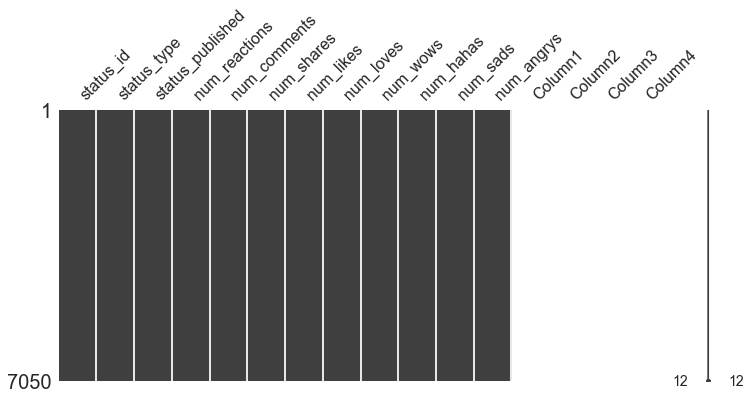

In [17]:
msno.matrix(df, figsize=(12,5))
plt.show()

**Observations:**
- We can see for clear that Column[1-4] is empty
- The rest of the columns have no empty values
- We'll drop Column[1-4]

In [33]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], inplace=True, axis=1)
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [34]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

print(f"Categorical columns: {cat_cols}")
print(f"Numeric columns: {num_cols}")

Categorical columns: ['status_type']
Numeric columns: ['status_id', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']


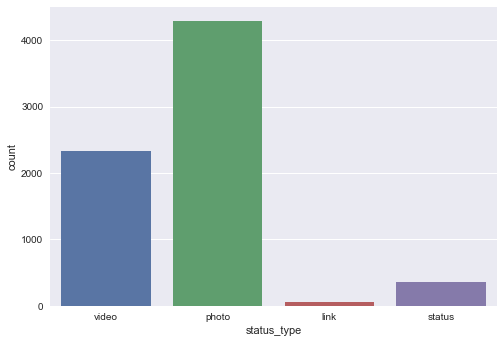

In [12]:
sns.countplot(x='status_type', data=df)
plt.show()

**Observations:**
- status_type is mostly photo, followed by video
- ink and status is very little compare to the others

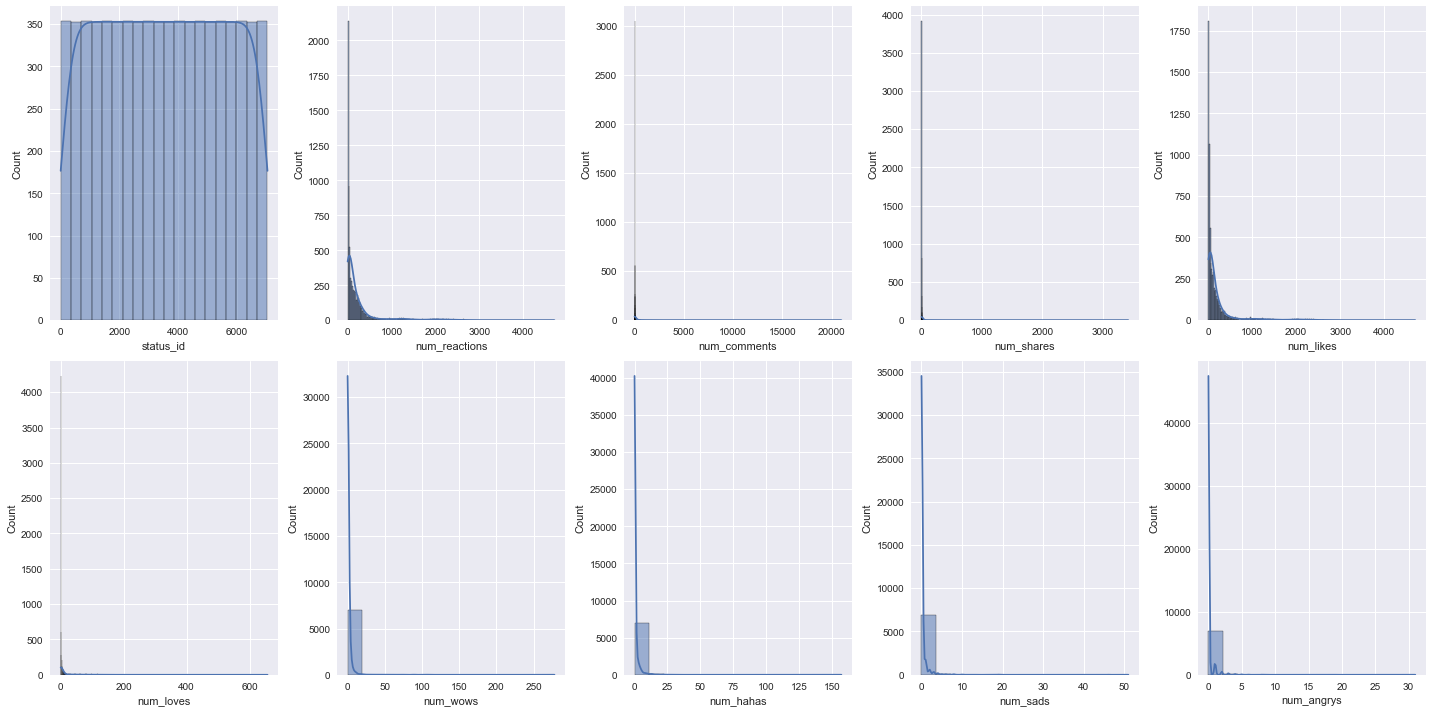

In [25]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=df, ax=axes[i // 5, i % 5], kde=True, linewidth=None)
fig.tight_layout()
plt.show()

Observations:
- status_id has high cardinality, hence we'll drop it
- All the feature is very highly right skewed, and is not distributed correctly

In [35]:
df.drop(['status_id'], inplace=True, axis=1)
num_cols.remove('status_id')
df.columns

Index(['status_type', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'],
      dtype='object')

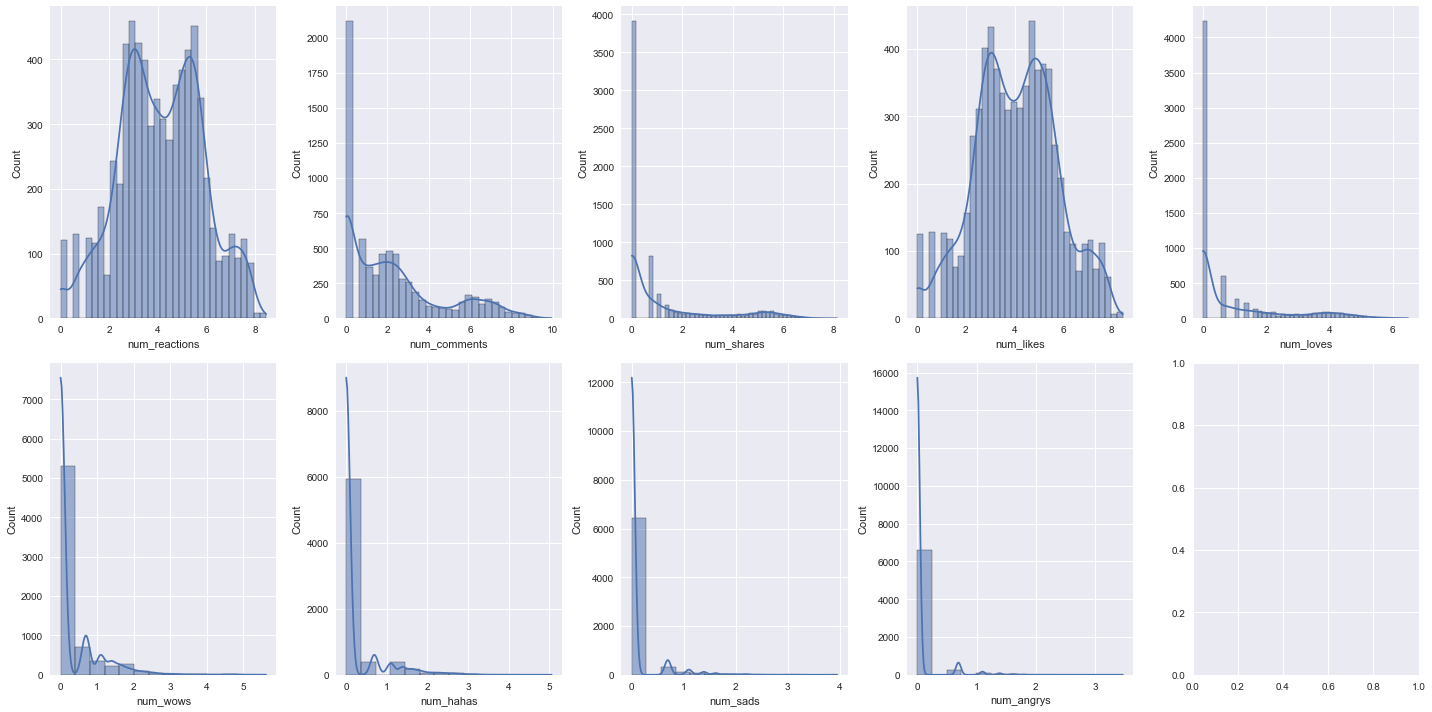

In [36]:
for col in num_cols:
    df[col] = np.log1p(df[col])
    
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=df, ax=axes[i // 5, i % 5], kde=True, linewidth=None)
fig.tight_layout()
plt.show()

I think the right skewness is way better, and very good in some of the features.

In [27]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

df['status_type'] = le.fit_transform(df['status_type'])
df.status_type

0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int32

### **Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
mms = MinMaxScaler()

df_scaled = pd.DataFrame(mms.fit_transform(df[num_cols]), columns=df[num_cols].columns)
df.drop(num_cols, inplace=True, axis=1)
df = pd.concat([df, df_scaled], axis=1)
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,2018-04-22 06:00:00,0.741680,0.627047,0.684636,0.717780,0.698483,0.24618,0.136915,0.175425,0.0
1,1,2018-04-21 22:45:00,0.593223,0.000000,0.000000,0.593223,0.000000,0.00000,0.000000,0.000000,0.0
2,3,2018-04-21 06:17:00,0.641945,0.549452,0.498896,0.629372,0.476336,0.12309,0.136915,0.000000,0.0
3,1,2018-04-21 02:29:00,0.557897,0.000000,0.000000,0.557897,0.000000,0.00000,0.000000,0.000000,0.0
4,1,2018-04-18 03:22:00,0.634452,0.000000,0.000000,0.629372,0.354833,0.00000,0.000000,0.000000,0.0


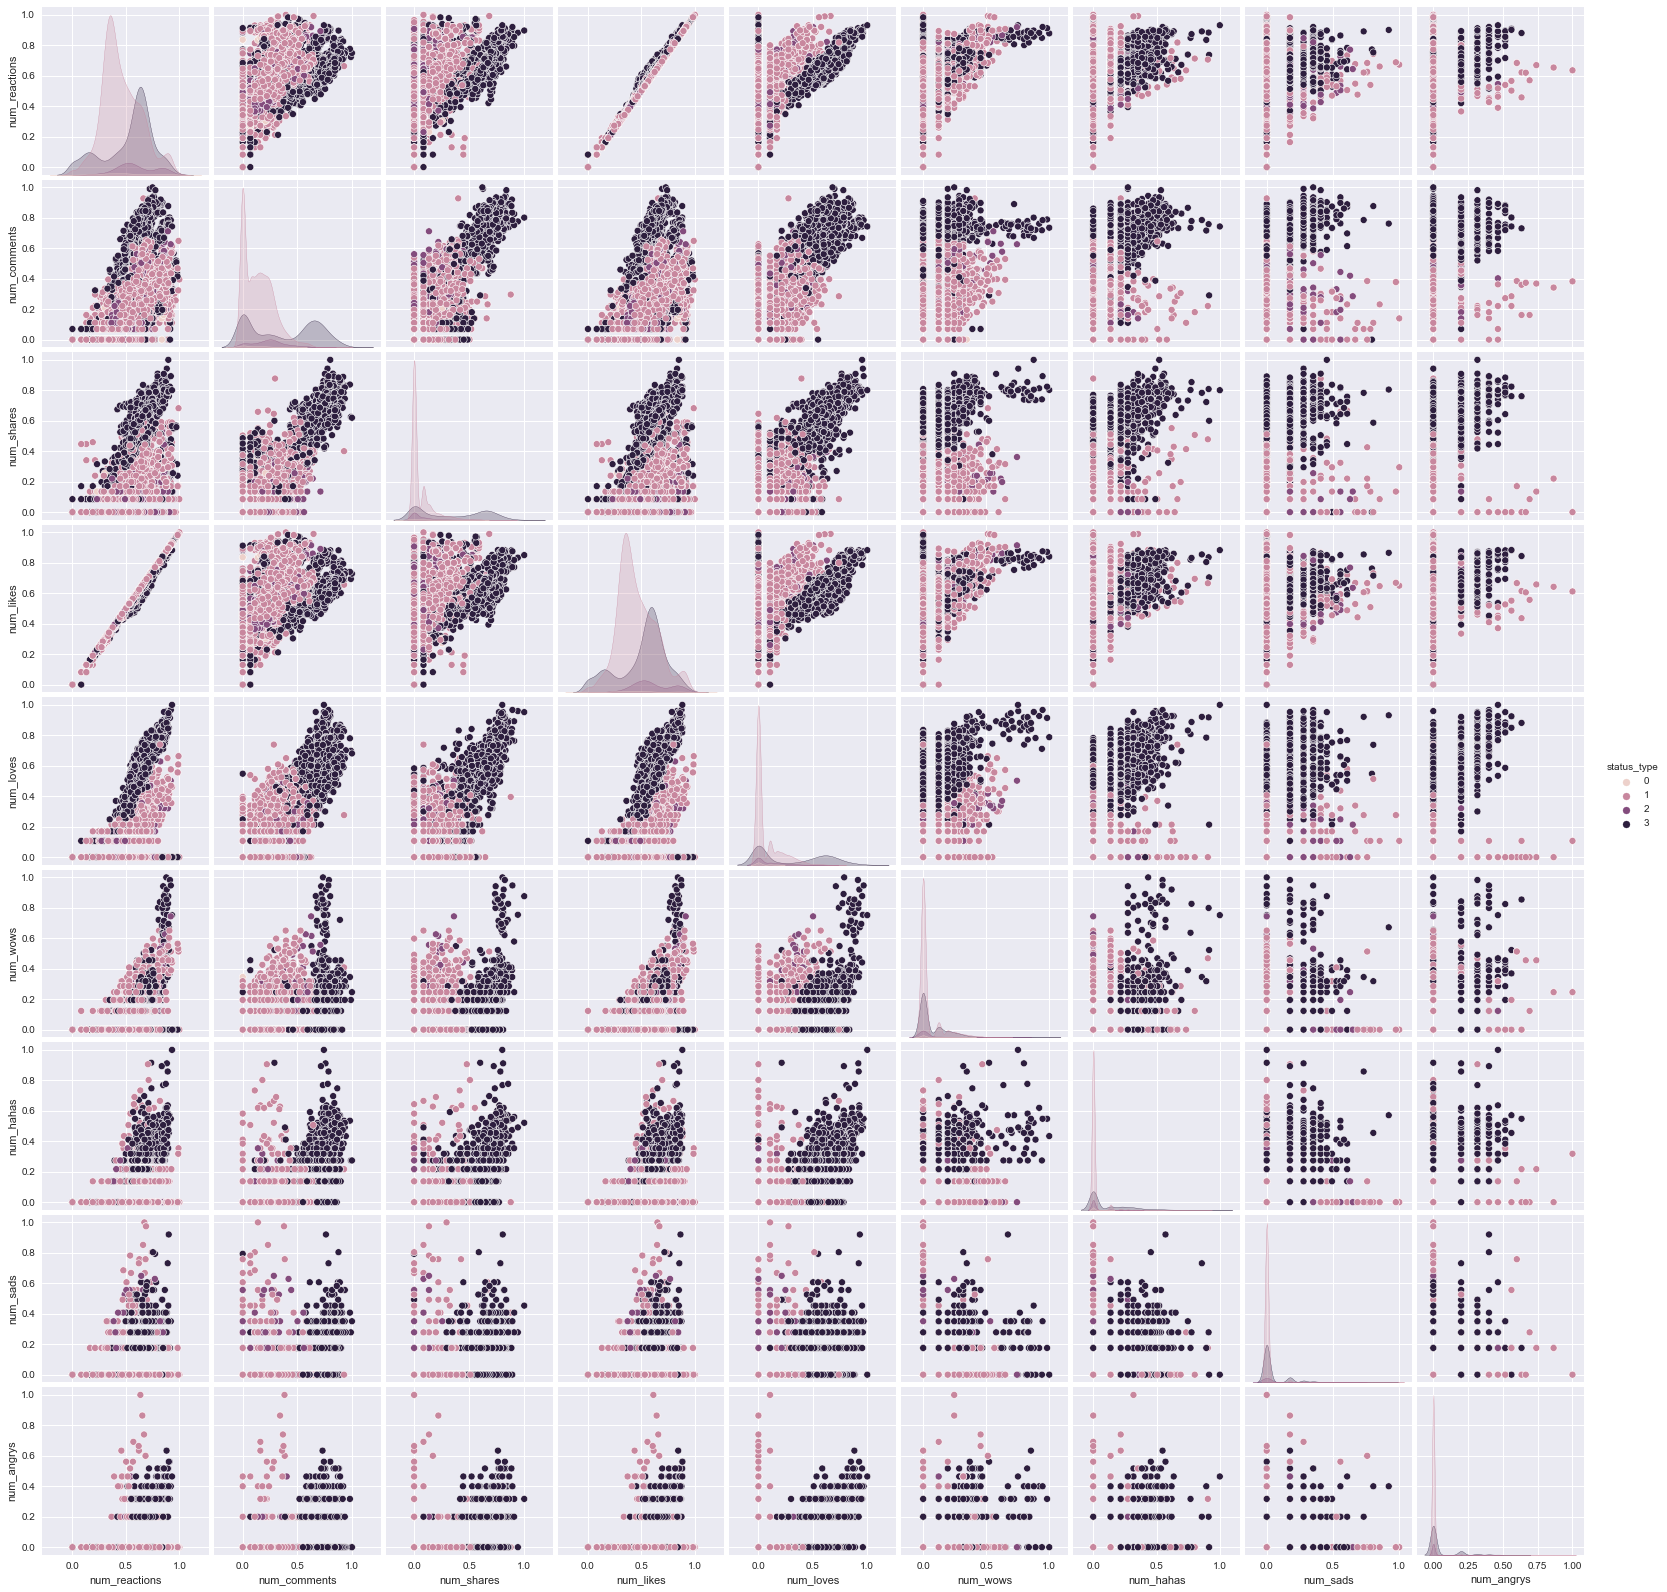

In [58]:
sns.pairplot(df, hue='status_type')

In [96]:
# split target and features
X = df[num_cols]
y = df.status_type

X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.741680,0.627047,0.684636,0.717780,0.698483,0.24618,0.136915,0.175425,0.0
1,0.593223,0.000000,0.000000,0.593223,0.000000,0.00000,0.000000,0.000000,0.0
2,0.641945,0.549452,0.498896,0.629372,0.476336,0.12309,0.136915,0.000000,0.0
3,0.557897,0.000000,0.000000,0.557897,0.000000,0.00000,0.000000,0.000000,0.0
4,0.634452,0.000000,0.000000,0.629372,0.354833,0.00000,0.000000,0.000000,0.0


In [42]:
from sklearn.cluster import KMeans

In [45]:
k_range = range(1, 10)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
sse

[1990.596827276449,
 974.1027786871196,
 616.9796370791738,
 531.5791416155627,
 475.4364287677481,
 423.0481815035409,
 378.12928037636556,
 356.2473041687682,
 339.1099539144502]

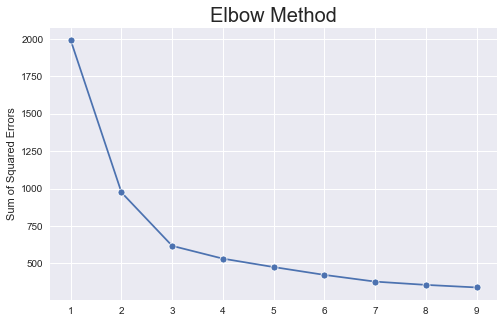

In [46]:
plt.figure(figsize=(8,5))
sns.lineplot(x=k_range, y=sse, marker="o")
plt.title("Elbow Method", size=20)
plt.ylabel("Sum of Squared Errors")
plt.show()

**Observations:**
- We can see that the best k is 3, we'll verify it using the silhoutte method!

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
k_range = range(2, 10)
sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in k_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))
  
sil

[0.5499151520465281,
 0.43418484335044577,
 0.311918200840009,
 0.29546521710988094,
 0.30615773200784363,
 0.31430373832934794,
 0.30504642333050824,
 0.28889257818284786]

In [50]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

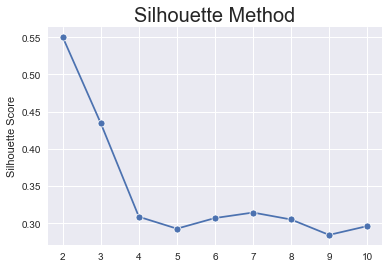

In [52]:
sns.lineplot(x=range(2, kmax+1), y=sil, marker="o")
plt.title("Silhouette Method", size=20)
plt.ylabel("Silhouette Score")
plt.show()

**Observations:**
- After looking the Silhouette Method, it seems like the best k is 2.
- The real target data is actually has 4 unique values, maybe that's becuase the proportion of the target data is not uniform and heavily distributed only in 2 values.

In [83]:
km = KMeans(n_clusters=2)

y_pred = km.fit_predict(X)
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [84]:
df_pred = pd.concat([X, pd.DataFrame(y_pred, columns=['cluster'])], axis=1)
df_pred.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,0.741680,0.627047,0.684636,0.717780,0.698483,0.24618,0.136915,0.175425,0.0,0
1,0.593223,0.000000,0.000000,0.593223,0.000000,0.00000,0.000000,0.000000,0.0,1
2,0.641945,0.549452,0.498896,0.629372,0.476336,0.12309,0.136915,0.000000,0.0,0
3,0.557897,0.000000,0.000000,0.557897,0.000000,0.00000,0.000000,0.000000,0.0,1
4,0.634452,0.000000,0.000000,0.629372,0.354833,0.00000,0.000000,0.000000,0.0,1


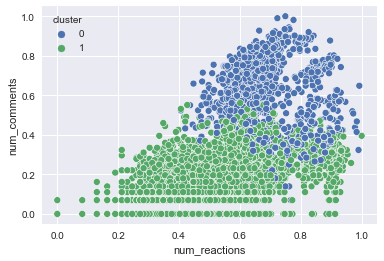

In [85]:
sns.scatterplot(x='num_reactions', y='num_comments', data=df_pred, hue='cluster')
plt.show()

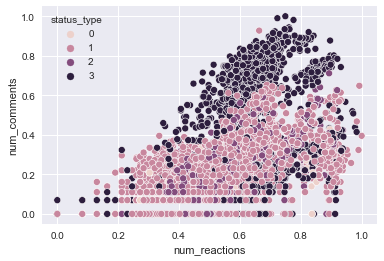

In [88]:
sns.scatterplot(x='num_reactions', y='num_comments', data=df, hue='status_type')
plt.show()

In [86]:
from sklearn.metrics import adjusted_rand_score, rand_score

In [87]:
print(f"Rand Score: {rand_score(y, y_pred)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(y, y_pred)}")

Rand Score: 0.6121168034498128
Adjusted Rand Score: 0.2340494786964501


### **Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance
* Analysis - perform PCA with 4 components and print their explained variance_ratio



In [111]:
fruit = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv")
fruit.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


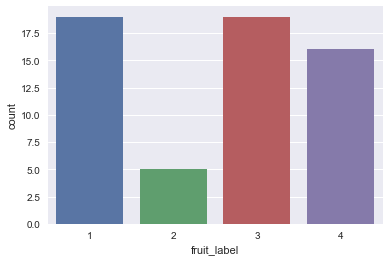

In [94]:
sns.countplot(x='fruit_label', data=fruit)
plt.show()

In [112]:
X2 = fruit.drop(['fruit_label'], axis=1)
y2 = fruit['fruit_label']

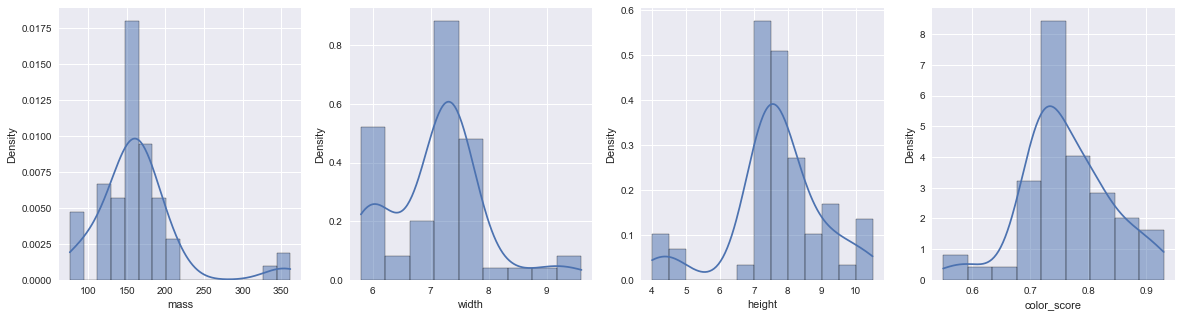

In [119]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(X2.columns.to_list()):
    sns.histplot(x=col, data=X2, ax=ax[i], kde=True, linewidth=None, stat='density')
fig.tight_layout
plt.show()

In [107]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA(n_components=2)
pca.fit_transform(X2)
print(f"PCA components: {pca.components_}")
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")

PCA components: [[ 9.99801368e-01  1.30294992e-02  1.50812835e-02 -1.11549572e-04]
 [ 1.30009687e-02  1.47136254e-01 -9.88879074e-01  1.73226594e-02]]
PCA explained variance ratio: [9.99563313e-01 3.91819537e-04]


In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X2), columns=X2.columns)
X_scaled.head()

,mass,width,height,color_score
0,0.529442,1.598690,-0.291397,-2.793595
1,0.309462,1.104854,-0.661922,-2.268684
2,0.236136,0.364100,-0.365502,-2.137456
3,-1.413709,-1.117409,-2.218131,0.487100
4,-1.450372,-1.364327,-2.292236,0.355872


In [124]:
pca2 = PCA(n_components=4)
pca2.fit_transform(X_scaled)
print(f"PCA components: {pca.components_}")
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")

PCA components: [[ 9.99801368e-01  1.30294992e-02  1.50812835e-02 -1.11549572e-04]
 [ 1.30009687e-02  1.47136254e-01 -9.88879074e-01  1.73226594e-02]]
PCA explained variance ratio: [9.99563313e-01 3.91819537e-04]
